In [11]:
import pandas as pd
import numpy as np
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [18]:
all_indicator_data = pd.read_csv('../data/all_indicators.csv')

In [19]:
indicators_filtered = all_indicator_data[all_indicator_data['Self-Reported General Health Assessment Poor or Fair'].notna()].copy()

In [20]:
indicators_filtered = indicators_filtered.drop(columns=['CES 4.0 Percentile Range'])

In [21]:
imputer = IterativeImputer(random_state=100, max_iter=10)
imputer.fit(indicators_filtered)
imputed_values = imputer.transform(indicators_filtered)

C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\sklearn\impute\_iterative.py:800: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [22]:
indicators_filtered.loc[:, indicators_filtered.columns] = imputed_values

In [23]:
indicators_filtered.columns

Index(['tract', 'Adults who are Sedentary',
       'Adults who have had a Routine Checkup', 'Adults with COPD',
       'Children with Low Access to a Grocery Store (% of Total Pop)',
       'Income Inequality', 'Low-Income and Low Access to a Grocery Store',
       'Overcrowded Households',
       'Self-Reported General Health Assessment Poor or Fair',
       'Workers Commuting by Public Transportation',
       'Workers who Walk to Work', 'Total Population', 'CES 4.0 Score',
       'CES 4.0 Percentile', 'Ozone', 'Ozone Pctl', 'PM2.5', 'PM2.5 Pctl',
       'Diesel PM', 'Diesel PM Pctl', 'Drinking Water', 'Drinking Water Pctl',
       'Lead', 'Lead Pctl', 'Pesticides', 'Pesticides Pctl', 'Tox. Release',
       'Tox. Release Pctl', 'Traffic', 'Traffic Pctl', 'Cleanup Sites',
       'Cleanup Sites Pctl', 'Groundwater Threats', 'Groundwater Threats Pctl',
       'Haz. Waste', 'Haz. Waste Pctl', 'Imp. Water Bodies',
       'Imp. Water Bodies Pctl', 'Solid Waste', 'Solid Waste Pctl',
       '

In [25]:
lm = LinearRegression()

outcome = 'Self-Reported General Health Assessment Poor or Fair'
y = indicators_filtered[outcome]
X = indicators_filtered.drop(columns=[outcome])

lm.fit(X, y)

w = lm.coef_
idx = np.argsort(w)[::-1]

for i in idx:
    print(f"{X.columns[i]}: {round(w[i], 3)}")

Solid Waste: 0.875
Poverty Pctl: 0.391
Education: 0.375
Diesel PM Pctl: 0.305
CES 4.0 Score: 0.286
Unemployment Pctl: 0.268
Low Birth Weight: 0.265
Housing Burden Pctl: 0.211
Pollution Burden Pctl: 0.21
Linguistic Isolation: 0.19
Traffic Pctl: 0.153
Lead Pctl: 0.146
Children with Low Access to a Grocery Store (% of Total Pop): 0.135
Linguistic Isolation Pctl: 0.13
Imp. Water Bodies: 0.118
Haz. Waste: 0.109
Pesticides Pctl: 0.087
Ozone Pctl: 0.081
Asthma Pctl: 0.07
Pollution Burden: 0.067
tract: 0.055
Low Birth Weight Pctl: 0.048
Tox. Release Pctl: 0.029
Solid Waste Pctl: 0.025
Tox. Release: 0.025
Diesel PM: 0.013
Pollution Burden Score: 0.008
Drinking Water: 0.004
Total Population: 0.001
Ozone: 0.0
CES 4.0 Percentile: -0.003
Pop. Char. Score: -0.007
Traffic: -0.009
PM2.5: -0.013
Groundwater Threats Pctl: -0.016
Adults with COPD: -0.021
Drinking Water Pctl: -0.026
Cardiovascular Disease: -0.029
Workers Commuting by Public Transportation: -0.037
Asthma: -0.037
Unemployment: -0.072
Pop. C

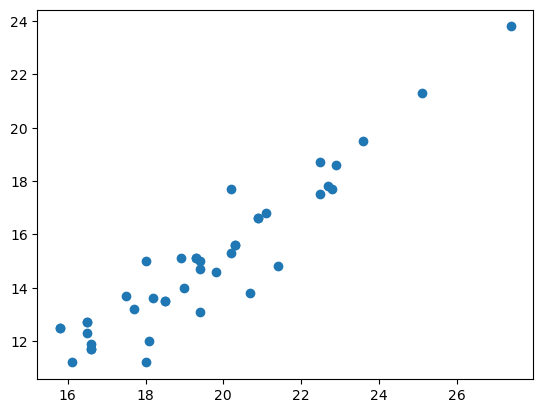

In [31]:
x = indicators_filtered['Adults who are Sedentary']
y = indicators_filtered[outcome]
plt.scatter(x, y)

In [35]:
len(indicators_filtered.columns)

62

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Code credit: https://stackoverflow.com/questions/48139899/correlation-matrix-plot-with-coefficients-on-one-side-scatterplots-on-another

sns.set(style='white')

def corrfunc(x, y, **kws):
    r, p = stats.pearsonr(x, y)
    p_stars = ''
    if p <= 0.05:
        p_stars = '*'
    if p <= 0.01:
        p_stars = '**'
    if p <= 0.001:
        p_stars = '***'
    ax = plt.gca()
    ax.annotate('r = {:.2f} '.format(r) + p_stars, xy=(0.05, 0.9), xycoords=ax.transAxes)

def annotate_colname(x, **kws):
    ax = plt.gca()
    ax.annotate(x.name, xy=(0.05, 0.9), xycoords=ax.transAxes, fontweight='bold')

def cor_matrix(df):
    grid = sns.PairGrid(df, palette=['red'])
    # Use normal regplot as `lowess=True` doesn't provide CIs.
    grid.map_upper(sns.regplot, scatter_kws={'s':10})
    grid.map_diag(sns.histplot, kde=True, kde_kws=dict(cut=3), alpha=.4, edgecolor=(1, 1, 1, .4))
    grid.map_diag(annotate_colname)
    grid.map_lower(sns.kdeplot, cmap='Blues_d')
    grid.map_lower(corrfunc)
    # Remove axis labels, as they're in the diagonals.
    for ax in grid.axes.flatten():
        ax.set_ylabel('')
        ax.set_xlabel('')
    return grid

C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
C:\Users\isaac\anaconda3\envs\geo\lib\site-packages\seaborn\axisg

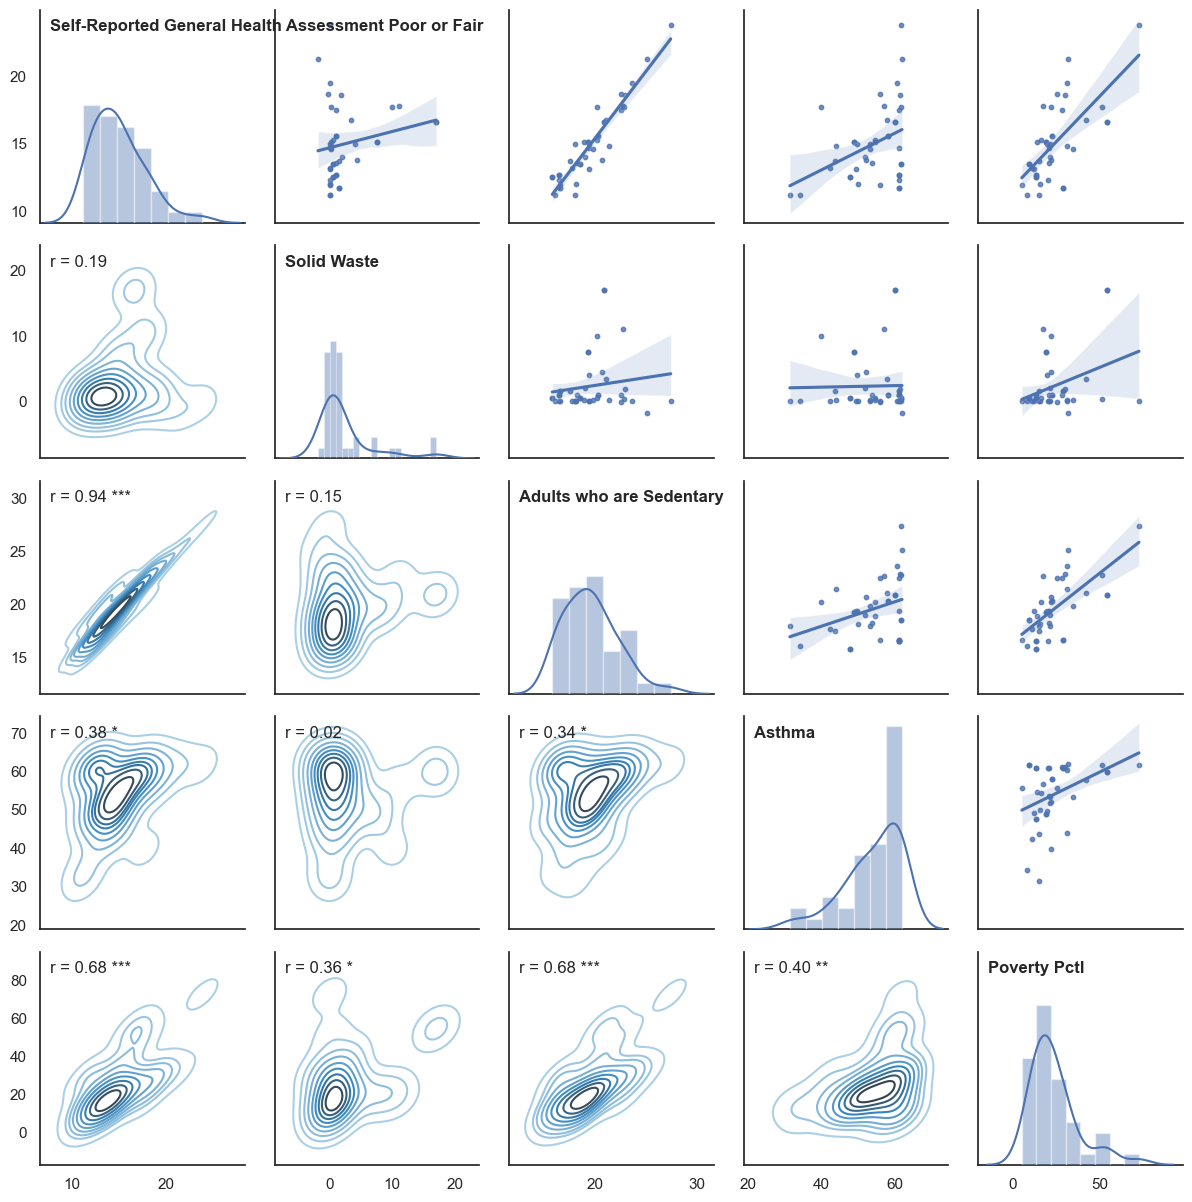

In [47]:
cor_matrix(indicators_filtered[[outcome, 'Solid Waste', 'Adults who are Sedentary', 'Asthma', 'Poverty Pctl']])

- Try variable selection
- For overlapping indicators, choose most granular
- Weird weights may be due to collinearity
- Narrow down manually first, then use a selection algorithm

In [48]:
sns.pairgrid(indicators_filtered)

AttributeError: module 'seaborn' has no attribute 'pairgrid'